In [1]:
import sys
sys.path.insert(0, r'../../../quetzal')

from quetzal.io import  gtfs_importer
from quetzal.model import stepmodel

In [2]:
training_folder = '../../'

In [3]:
sm = stepmodel.read_zip(training_folder + r'model/preparation/walk_model.zip')

read_hdf: : 100%|██████████████████████████████████████████████████████████████████████| 22/22 [00:01<00:00, 20.83it/s]


# required fields !

In [4]:
sm.links['headway'] = 300
sm.links['length'] = sm.links['road_length']

# rail

In [5]:
rail = sm.copy()
rail.links = rail.links.loc[rail.links['route_type'].isin([ 'subway'])] # ['tram', 'subway', 'rail']

In [6]:
rail.step_pt_pathfinder(
    broken_routes=True,
    broken_modes=False,
    route_column='route_id',
    mode_column='route_type',
    speedup=True
)

path_analysis: 100%|██████████████████████████████████████████████████████████| 29532/29532 [00:00<00:00, 30382.54it/s]


In [10]:
rail.pt_los.set_index(['origin', 'destination'])['pathfinder_session'].value_counts()

route_braker    17432
best_path       12100
Name: pathfinder_session, dtype: int64

In [10]:
sm.links.drop(['index'],axis=1,inplace=True,errors='ignore' )

In [11]:
sm.step_pt_pathfinder(
    broken_routes=False,
    broken_modes=True
)

path_analysis: 100%|██████████████████████████████████████████████████████████| 53974/53974 [00:02<00:00, 26073.68it/s]


In [12]:
pathfound = sm.copy()

In [13]:
import pandas as pd
pathfound.pt_los = pd.concat(
    [sm.pt_los, rail.pt_los]
).drop_duplicates(subset=['path'])

In [14]:
pathfound.pt_los.set_index(['origin', 'destination'])['pathfinder_session'].value_counts()

mode_braker     41874
route_braker    16895
best_path       12100
Name: pathfinder_session, dtype: int64

# display

In [15]:
projected = pathfound.change_epsg(4326, 'degree')

Reprojecting model from epsg 2154 to epsg 4326: 100%|██████████████████████████████████| 31/31 [00:03<00:00,  8.69it/s]


In [16]:
from quetzal.io import display
from imp import reload
reload(display)

<module 'quetzal.io.display' from '../../../quetzal\\quetzal\\io\\display.py'>

In [47]:
rainbow_shades = ["#D22328", "#559BB4", "#91A564", "#DC9100", "#8C4B7D", "#A08C69",
                  "#647D6E", "#5A7382", "#64411E", "#A00037", "#643C5A"]

#sm.links['trip_id'] = sm.links['dir_line']
sm.analysis_lines()
sm.lines['line_color'] = list(rainbow_shades[:5]*10000)[: len(sm.lines)]
d = sm.lines.set_index('route_id')['line_color'].to_dict()
sm.links['line_color'] = sm.links['route_id'].apply(
    lambda x: d[x] if x in d.keys() else "#D22328"
)

In [48]:
projected.links

,a,agency_id,arrival_time,b,departure_time,direction_id,geometry,link_sequence,road_a,road_b,...,trip_short_name,disaggregated_a,disaggregated_b,headway,length,duration,cost,origin,destination,line_color
link_0,346,100,1500.0,346,1200.0,0,LINESTRING (2.342230100000001 48.8852943999863...,1,94236061,94236061,...,81809,node_2090,node_2091,300,0.000000,300.0,450.0,346,346,#D22328
link_1,346,100,1500.0,346,1200.0,1,LINESTRING (2.342230100000001 48.8852943999863...,1,94236061,94236061,...,81811,node_2552,node_2551,300,0.000000,300.0,450.0,346,346,#D22328
link_20,275,100,76680.0,48,76560.0,0,LINESTRING (2.355959799999999 48.8797764999863...,1,94181307,5297531445,...,100,node_3764604,node_3764606,300,8.682311,120.0,270.0,275,48,#D22328
link_21,48,100,76860.0,233,76680.0,0,LINESTRING (2.355939199999999 48.8796995999863...,2,5297531445,94201292,...,100,node_3764606,node_3764607,300,510.592653,180.0,330.0,48,233,#D22328
link_22,233,100,76980.0,87,76860.0,0,"LINESTRING (2.3574103 48.87627949998636, 2.357...",3,94201292,169315420,...,100,node_3764607,node_3764609,300,355.140764,120.0,270.0,233,87,#D22328
link_23,87,100,77100.0,270,76980.0,0,LINESTRING (2.358613500000001 48.8743103999863...,4,169315420,123256917,...,100,node_3764609,node_3764610,300,302.854322,120.0,270.0,87,270,#D22328
link_24,270,100,77220.0,73,77100.0,0,LINESTRING (2.357143300000001 48.8717658999863...,5,123256917,175026494,...,100,node_3764610,node_3764611,300,380.373086,120.0,270.0,270,73,#D22328
link_25,73,100,77340.0,180,77220.0,0,"LINESTRING (2.3553905 48.86863779998636, 2.355...",6,175026494,470203,...,100,node_3764611,node_3764612,300,318.927022,120.0,270.0,73,180,#D22328
link_26,180,100,77400.0,222,77340.0,0,LINESTRING (2.353766000000001 48.8659769999863...,7,470203,361075,...,100,node_3764612,node_3764613,300,478.858660,60.0,210.0,180,222,#D22328
link_27,222,100,77520.0,83,77400.0,0,"LINESTRING (2.3542825 48.86273069998633, 2.354...",8,361075,25554704,...,100,node_3764613,node_3764614,300,374.200502,120.0,270.0,222,83,#D22328


In [52]:
display.all_pt_paths(projected, 'zone_10',  'zone_108', color_column='line_color', group_name='route_short_name')

10 paths


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  5.94it/s]


In [50]:
display.all_pt_paths(projected, 'zone_100',  'zone_70', color_column='route_color', group_name='route_short_name')

7 paths


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.24it/s]


In [25]:
display.all_pt_paths(projected, 'zone_1', 'zone_100')


5 paths


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.87it/s]


In [71]:
pathfound.to_zip(training_folder + 'model/transport/multi_pathfinder.zip')

to_hdf(new file): 100%|████████████████████████████████████████████████████████████████| 31/31 [00:04<00:00,  5.95it/s]


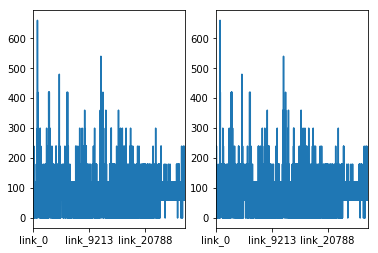

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(1)                # the first figure
plt.subplot(121)  # the first subplot in the first figure
sm.links['time'].plot()
plt.subplot(122)             # the second subplot in the first figure
sm.links['time'].plot()